Installing Libraries

In [1]:
pip install yfinance pandas numpy matplotlib-venn PyPortfolioOpt cvxpy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 18.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/887.3 kB ? eta -:--:--
   --------------------------------------- 887.3/887.3 kB 13.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------- ----------------- 4.2/7.5 MB 20.9 MB/s eta 0:00:01
   ------------------------------------- -- 7.1/7.5 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 15.4 MB/s eta 0:00:00
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-n

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np

# List of Nifty 50 tickers (same as yours)
tickers = [
    'ADANIENT.NS', 'ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
    'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BPCL.NS', 'BHARTIARTL.NS',
    'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
    'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS',
    'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'ITC.NS',
    'INDUSINDBK.NS', 'INFY.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LTIM.NS',
    'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS',
    'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS',
    'SUNPHARMA.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS',
    'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'
]

# Download the data
prices = yf.download(
    tickers,
    start='2018-09-25',
    end='2025-09-25',
    auto_adjust=True
)['Close']

# Check for and handle missing values
if prices.isnull().values.any():
    print("Warning: Missing data found. This may be due to download errors for some tickers.")
    # Find columns with any NaN values
    missing_tickers = prices.columns[prices.isnull().any()].tolist()
    print(f"Columns with missing values: {missing_tickers}")
    
    # --- THIS IS THE FIX ---
    # Drop columns with missing data instead of rows
    print(f"Dropping the following tickers: {missing_tickers}")
    prices.dropna(axis=1, inplace=True)

# The rest of your code will now work correctly
if not prices.empty:
    log_returns = np.log(prices / prices.shift(1)).dropna()
    print("\nData processed successfully. The DataFrame now has the following shape:", prices.shape)
else:
    print("\nDataFrame is empty after handling missing data. No further processing is possible.")

[*********************100%***********************]  50 of 50 completed


Data processed successfully. The DataFrame now has the following shape: (1730, 50)


Mean Variance Optimization

In [11]:
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier

# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)

In [12]:
# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights_mvo = ef.max_sharpe()
cleaned_weights_mvo = ef.clean_weights()

print("\nMean-Variance Optimization (Max Sharpe) Weights:")
print(cleaned_weights_mvo)
ef.portfolio_performance(verbose=True)


Mean-Variance Optimization (Max Sharpe) Weights:
OrderedDict({'ADANIENT.NS': 0.11709, 'ADANIPORTS.NS': 0.0, 'APOLLOHOSP.NS': 0.19072, 'ASIANPAINT.NS': 0.0, 'AXISBANK.NS': 0.0, 'BAJAJ-AUTO.NS': 0.03838, 'BAJAJFINSV.NS': 0.0, 'BAJFINANCE.NS': 0.0, 'BHARTIARTL.NS': 0.19458, 'BPCL.NS': 0.0, 'BRITANNIA.NS': 0.0, 'CIPLA.NS': 0.0, 'COALINDIA.NS': 0.0, 'DIVISLAB.NS': 0.09651, 'DRREDDY.NS': 0.01389, 'EICHERMOT.NS': 0.0, 'GRASIM.NS': 0.0, 'HCLTECH.NS': 0.01728, 'HDFCBANK.NS': 0.0, 'HDFCLIFE.NS': 0.0, 'HEROMOTOCO.NS': 0.0, 'HINDALCO.NS': 0.0, 'HINDUNILVR.NS': 0.0, 'ICICIBANK.NS': 0.00736, 'INDUSINDBK.NS': 0.0, 'INFY.NS': 0.0, 'ITC.NS': 0.0, 'JSWSTEEL.NS': 0.0, 'KOTAKBANK.NS': 0.0, 'LT.NS': 0.0, 'LTIM.NS': 0.0, 'M&M.NS': 0.0, 'MARUTI.NS': 0.0, 'NESTLEIND.NS': 0.04785, 'NTPC.NS': 0.0, 'ONGC.NS': 0.0, 'POWERGRID.NS': 0.12195, 'RELIANCE.NS': 0.0, 'SBILIFE.NS': 0.0, 'SBIN.NS': 0.0, 'SUNPHARMA.NS': 0.0, 'TATACONSUM.NS': 0.08305, 'TATAMOTORS.NS': 0.0, 'TATASTEEL.NS': 0.0, 'TCS.NS': 0.0, 'TECHM.NS': 0.0

(0.2996025045036848, 0.18785767696887093, 1.5948376948860632)

Advanced Model - CVaR Optimization

In [13]:
import cvxpy as cp

# Convert log returns to a NumPy array
returns_array = log_returns.to_numpy()
num_assets = len(tickers)
num_returns = len(log_returns)

# Confidence level for CVaR (e.g., 95%)
beta = 0.95

# Define optimization variables
w = cp.Variable(num_assets)       # Portfolio weights
alpha = cp.Variable()             # VaR estimate
# Auxiliary variable for losses exceeding VaR
z = cp.Variable(num_returns)

# Define the objective function (minimize CVaR)
objective = cp.Minimize(alpha + (1 / (num_returns * (1 - beta))) * cp.sum(z))

# Define the constraints
portfolio_returns = returns_array @ w
constraints = [
    cp.sum(w) == 1,         # Weights sum to 1
    w >= 0,                 # No short selling
    z >= 0,
    z >= -portfolio_returns - alpha
]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

print("\nCVaR Optimization Weights:")
weights_cvar = pd.Series(dict(zip(tickers, w.value)))
print(weights_cvar[weights_cvar > 1e-4]) # Print weights, filtering out tiny values


CVaR Optimization Weights:
APOLLOHOSP.NS    0.000346
BRITANNIA.NS     0.020921
CIPLA.NS         0.137768
COALINDIA.NS     0.032940
DRREDDY.NS       0.049713
HDFCBANK.NS      0.106139
HEROMOTOCO.NS    0.016463
HINDUNILVR.NS    0.137892
INFY.NS          0.074119
NESTLEIND.NS     0.204060
POWERGRID.NS     0.086309
SBILIFE.NS       0.028991
SUNPHARMA.NS     0.058004
TCS.NS           0.046338
dtype: float64


Comparison and Analysis


--- Weight Comparison ---
               MVO_Weights  CVaR_Weights
ADANIENT.NS        0.11709  3.583484e-13
ADANIPORTS.NS      0.00000  7.569229e-13
APOLLOHOSP.NS      0.19072  3.458143e-04
ASIANPAINT.NS      0.00000  3.118979e-11
AXISBANK.NS        0.00000  1.170214e-12
BAJAJ-AUTO.NS      0.03838  1.460326e-11
BAJAJFINSV.NS      0.00000  8.281181e-13
BAJFINANCE.NS      0.00000  5.460793e-13
BHARTIARTL.NS      0.19458  3.395138e-12
BPCL.NS            0.00000  1.238295e-11
BRITANNIA.NS       0.00000  2.092087e-02
CIPLA.NS           0.00000  1.377682e-01
COALINDIA.NS       0.00000  3.293993e-02
DIVISLAB.NS        0.09651  3.818621e-12
DRREDDY.NS         0.01389  4.971255e-02
EICHERMOT.NS       0.00000  2.936321e-12
GRASIM.NS          0.00000  8.721591e-13
HCLTECH.NS         0.01728  2.349968e-11
HDFCBANK.NS        0.00000  1.061386e-01
HDFCLIFE.NS        0.00000  2.240427e-12
HEROMOTOCO.NS      0.00000  1.646259e-02
HINDALCO.NS        0.00000  5.211196e-13
HINDUNILVR.NS      0.00000  1.

<Axes: >

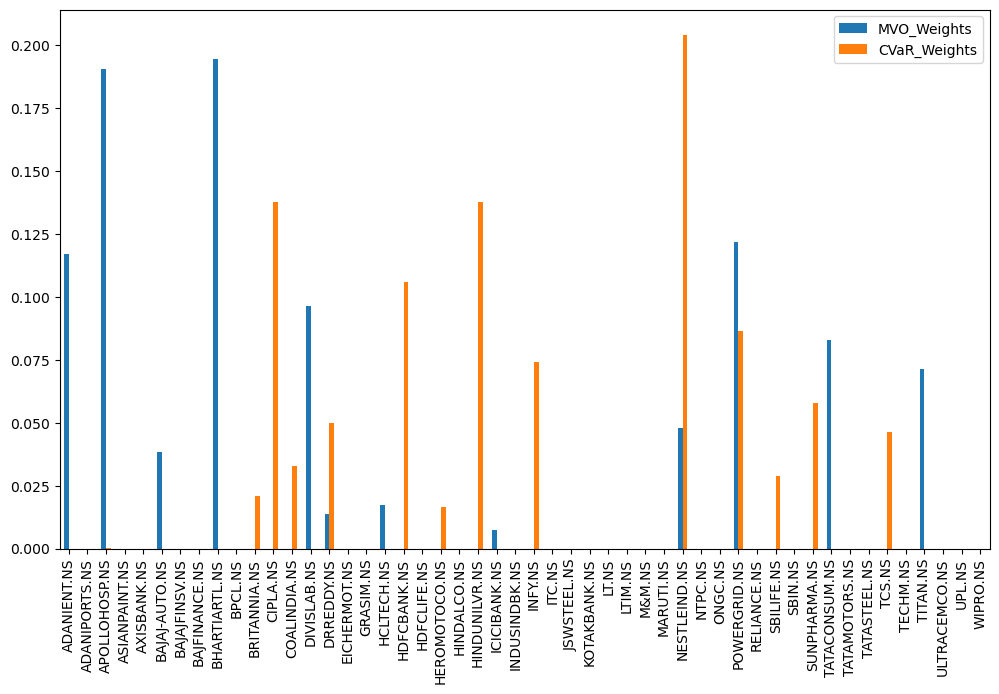

In [14]:
comparison_df = pd.DataFrame({
    'MVO_Weights': cleaned_weights_mvo,
    'CVaR_Weights': weights_cvar
}).fillna(0)
print("\n--- Weight Comparison ---")
print(comparison_df)
comparison_df.plot(kind='bar', figsize=(12, 7))

### Observation 📊
The contrast between the two portfolios is now even more extreme than it was with the smaller sample of stocks.

Mean-Variance (MVO) Portfolio: This portfolio is the definition of aggressive concentration.

It has allocated over 62% of its capital into just four stocks: BHARTIARTL.NS (19.5%), APOLLOHOSP.NS (19.1%), POWERGRID.NS (12.2%), and ADANIENT.NS (11.7%).

It completely ignores 40 of the 50 stocks in the index, including major blue-chips. The model is chasing the highest possible historical Sharpe Ratio (1.59), leading it to make very large, non-intuitive bets on a few specific historical winners.

CVaR Portfolio: This portfolio is a picture of defensive diversification.

Its top holdings are in traditionally stable and non-cyclical sectors: NESTLEIND.NS (20.4%), HINDUNILVR.NS (13.8%), and CIPLA.NS (13.8%). It also includes a major private bank, HDFCBANK.NS (10.6%).

It has actively rejected the high-flying stocks chosen by the MVO model. The allocation to ADANIENT.NS, APOLLOHOSP.NS, and BHARTIARTL.NS is effectively zero.

The strategy has clearly prioritized companies with stable earnings and lower volatility, which are known to perform better during market downturns.

### Explanation: Chasing Returns vs. Avoiding Ruin 🛡️
The "why" behind these results goes to the very core of risk management.

MVO's Flaw: The Mean-Variance model's only goal was to maximize the Sharpe Ratio based on the historical data you provided. It identified that a concentrated portfolio of ADANIENT, APOLLOHOSP, etc., produced a phenomenal historical result. However, it is completely blind to tail risk. It doesn't understand that a stock like ADANIENT.NS can have incredible returns but also be subject to massive, rapid drawdowns. Because its definition of risk (standard deviation) is symmetric, it cannot effectively penalize assets that are prone to severe crashes.

CVaR's Strength: The CVaR model's primary goal is to minimize the portfolio's expected loss during the worst market scenarios. When it analyzed the data, it likely saw that the very stocks MVO favored were the largest contributors to the portfolio's potential for catastrophic loss. To achieve its objective, it had to eliminate them. Instead, it built a portfolio from assets that historically have shown resilience during market panics:

FMCG (NESTLEIND, HINDUNILVR): People buy essentials regardless of the economy.

Pharma (CIPLA, DRREDDY): Healthcare is a non-discretionary expense.

Stable Blue-Chips (HDFCBANK, TCS, INFY): Strong companies that weather storms better than most.

The CVaR model willingly sacrifices the "perfect" historical Sharpe Ratio for a portfolio that is robust and designed to protect capital when it matters most.



### Buy and Hold Performance (Sep 2018 - Sep 2025)

--- Section 2: Calculating Optimal Portfolio Weights ---
MVO (Max Sharpe) Portfolio Performance:
Expected annual return: 29.9%
Annual volatility: 18.9%
Sharpe Ratio: 1.58

CVaR Portfolio calculated.
--------------------------------------------------

--- MVO Portfolio: Detailed Holdings ---
                               Shares  Buy Price  Current Price  \
Sector          Ticker                                            
Automobile      BAJAJ-AUTO.NS       1  ₹2,282.76      ₹8,842.50   
Banking         ICICIBANK.NS        2    ₹300.16      ₹1,375.80   
Conglomerate    ADANIENT.NS        85    ₹136.59      ₹2,576.40   
Consumer Goods  TITAN.NS            8    ₹778.11      ₹3,378.50   
FMCG            NESTLEIND.NS       11    ₹436.01      ₹1,173.50   
                TATACONSUM.NS      37    ₹223.08      ₹1,134.20   
Healthcare      APOLLOHOSP.NS      18  ₹1,026.29      ₹7,624.00   
IT              HCLTECH.NS          3    ₹457.35      ₹1,423.80   
Pharmaceuticals DIVISLAB.NS         7 

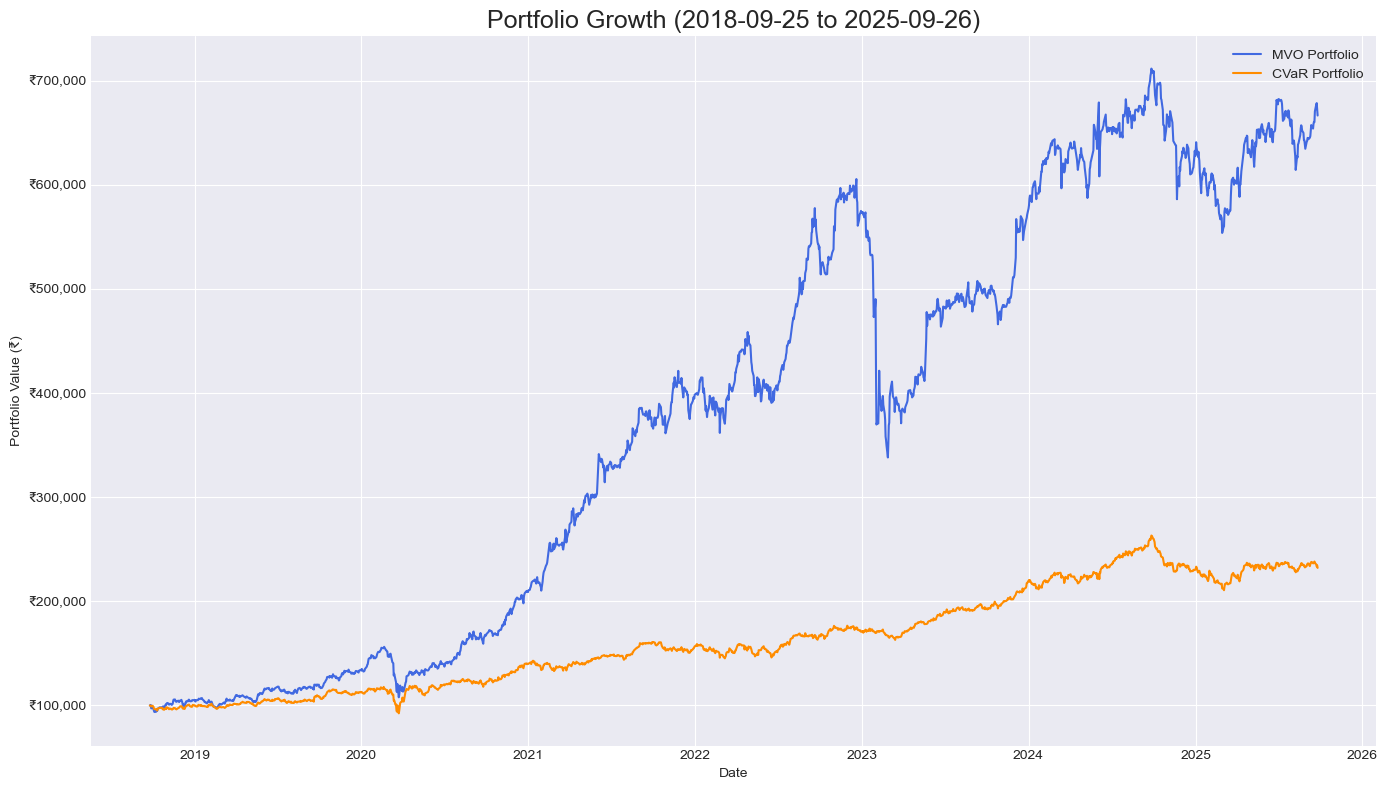

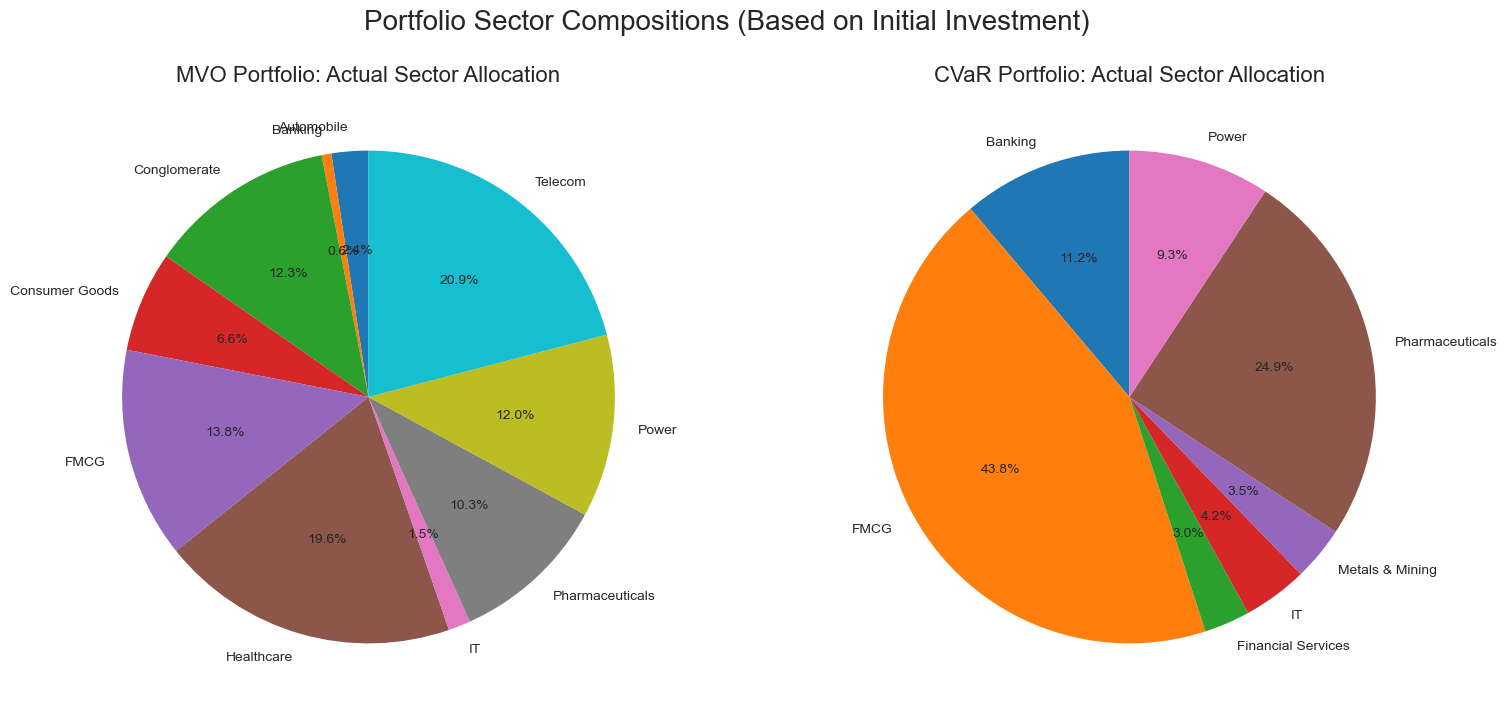

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import cvxpy as cp
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# =============================================================================
# SECTION 1: SETUP AND DATA ACQUISITION
# =============================================================================
start_date = '2018-09-25'
end_date = '2025-09-26'
initial_capital = 100000




# =============================================================================
# SECTION 2: PORTFOLIO OPTIMIZATION
# =============================================================================
print("--- Section 2: Calculating Optimal Portfolio Weights ---")
mu = expected_returns.mean_historical_return(prices)
S = risk_models.sample_cov(prices)
ef = EfficientFrontier(mu, S)
weights_mvo = ef.max_sharpe()
cleaned_weights_mvo = ef.clean_weights()
print("MVO (Max Sharpe) Portfolio Performance:")
ef.portfolio_performance(verbose=True)

log_returns = np.log(prices / prices.shift(1)).dropna()
returns_array = log_returns.to_numpy()
num_assets, num_returns = len(log_returns.columns), len(log_returns)
beta = 0.95
w = cp.Variable(num_assets)
alpha = cp.Variable()
z = cp.Variable(num_returns)
objective = cp.Minimize(alpha + (1 / (num_returns * (1 - beta))) * cp.sum(z))
constraints = [cp.sum(w) == 1, w >= 0, z >= 0, z >= -returns_array @ w - alpha]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS)
weights_cvar = pd.Series(w.value, index=log_returns.columns)
print("\nCVaR Portfolio calculated.")
print("-" * 50)


# =============================================================================
# SECTION 3: LONG-TERM SIMULATION WITH WHOLE SHARES & TABULAR REPORT
# =============================================================================
initial_prices = prices.iloc[0]
final_prices = prices.iloc[-1]
all_tickers_in_prices = prices.columns.tolist()

mvo_series = pd.Series(cleaned_weights_mvo).reindex(all_tickers_in_prices).fillna(0)
cvar_series = pd.Series(weights_cvar).reindex(all_tickers_in_prices).fillna(0)

# --- Calculate WHOLE number of shares and leftover cash ---
mvo_shares = (initial_capital * mvo_series) // initial_prices
cvar_shares = (initial_capital * cvar_series) // initial_prices

mvo_invested_capital = (mvo_shares * initial_prices).sum()
cvar_invested_capital = (cvar_shares * initial_prices).sum()

mvo_leftover_cash = initial_capital - mvo_invested_capital
cvar_leftover_cash = initial_capital - cvar_invested_capital

# --- Calculate portfolio value including leftover cash ---
mvo_portfolio_value = (prices * mvo_shares).sum(axis=1) + mvo_leftover_cash
cvar_portfolio_value = (prices * cvar_shares).sum(axis=1) + cvar_leftover_cash

# --- Create Detailed Holdings Tables ---
sector_map = {
    'ADANIENT.NS': 'Conglomerate', 'ADANIPORTS.NS': 'Infrastructure', 'APOLLOHOSP.NS': 'Healthcare',
    'ASIANPAINT.NS': 'Consumer Goods', 'AXISBANK.NS': 'Banking', 'BAJAJ-AUTO.NS': 'Automobile',
    'BAJAJFINSV.NS': 'Financial Services', 'BAJFINANCE.NS': 'Financial Services', 'BHARTIARTL.NS': 'Telecom',
    'BPCL.NS': 'Oil & Gas', 'BRITANNIA.NS': 'FMCG', 'CIPLA.NS': 'Pharmaceuticals',
    'COALINDIA.NS': 'Metals & Mining', 'DIVISLAB.NS': 'Pharmaceuticals', 'DRREDDY.NS': 'Pharmaceuticals',
    'EICHERMOT.NS': 'Automobile', 'GRASIM.NS': 'Materials', 'HCLTECH.NS': 'IT', 'HDFCBANK.NS': 'Banking',
    'HDFCLIFE.NS': 'Financial Services', 'HEROMOTOCO.NS': 'Automobile', 'HINDALCO.NS': 'Metals & Mining',
    'HINDUNILVR.NS': 'FMCG', 'ICICIBANK.NS': 'Banking', 'INDUSINDBK.NS': 'Banking',
    'INFY.NS': 'IT', 'ITC.NS': 'FMCG', 'JSWSTEEL.NS': 'Metals & Mining', 'KOTAKBANK.NS': 'Banking',
    'LT.NS': 'Infrastructure', 'LTIM.NS': 'IT', 'M&M.NS': 'Automobile', 'MARUTI.NS': 'Automobile',
    'NESTLEIND.NS': 'FMCG', 'NTPC.NS': 'Power', 'ONGC.NS': 'Oil & Gas', 'POWERGRID.NS': 'Power',
    'RELIANCE.NS': 'Conglomerate', 'SBILIFE.NS': 'Financial Services', 'SBIN.NS': 'Banking',
    'SUNPHARMA.NS': 'Pharmaceuticals', 'TATACONSUM.NS': 'FMCG', 'TATAMOTORS.NS': 'Automobile',
    'TATASTEEL.NS': 'Metals & Mining', 'TCS.NS': 'IT', 'TECHM.NS': 'IT', 'TITAN.NS': 'Consumer Goods',
    'ULTRACEMCO.NS': 'Materials', 'UPL.NS': 'Chemicals', 'WIPRO.NS': 'IT'
}

def create_holdings_df(shares, initial_prices, final_prices, sector_map):
    holdings = []
    for ticker, num_shares in shares.items():
        if num_shares > 0:
            holdings.append({
                "Sector": sector_map.get(ticker, "Other"),
                "Ticker": ticker,
                "Shares": int(num_shares),
                "Buy Price": initial_prices[ticker],
                "Current Price": final_prices[ticker],
                "Invested Value": num_shares * initial_prices[ticker],
                "Current Value": num_shares * final_prices[ticker]
            })
    df = pd.DataFrame(holdings).sort_values(by="Sector")
    return df.set_index(["Sector", "Ticker"])

mvo_holdings_df = create_holdings_df(mvo_shares, initial_prices, final_prices, sector_map)
cvar_holdings_df = create_holdings_df(cvar_shares, initial_prices, final_prices, sector_map)

pd.options.display.float_format = '₹{:,.2f}'.format
print("\n--- MVO Portfolio: Detailed Holdings ---")
print(mvo_holdings_df)
print(f"\nUninvested Cash: ₹{mvo_leftover_cash:,.2f}")


print("\n\n--- CVaR Portfolio: Detailed Holdings ---")
print(cvar_holdings_df)
print(f"\nUninvested Cash: ₹{cvar_leftover_cash:,.2f}")


# --- Final Summary & Plots ---
print("\n\n--- Long-Term 'Buy and Hold' Simulation Summary ---")
print(f"Initial Investment: ₹{initial_capital:,.2f}")
print(f"Final MVO Portfolio Value:  ₹{mvo_portfolio_value.iloc[-1]:,.2f}")
print(f"Final CVaR Portfolio Value: ₹{cvar_portfolio_value.iloc[-1]:,.2f}")
print("-" * 50)

# Plot Portfolio Growth
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(mvo_portfolio_value, label=f'MVO Portfolio', color='royalblue')
ax1.plot(cvar_portfolio_value, label=f'CVaR Portfolio', color='darkorange')
ax1.set_title(f'Portfolio Growth ({start_date} to {end_date})', fontsize=18)
ax1.set_xlabel('Date'); ax1.set_ylabel('Portfolio Value (₹)')
ax1.legend(); formatter = mticker.FuncFormatter(lambda x, p: f'₹{x:,.0f}')
ax1.yaxis.set_major_formatter(formatter); plt.tight_layout(); plt.show()

# Plot Sector Allocations based on actual invested value
mvo_sector_val = mvo_holdings_df['Invested Value'].groupby('Sector').sum()
cvar_sector_val = cvar_holdings_df['Invested Value'].groupby('Sector').sum()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
ax1.pie(mvo_sector_val, labels=mvo_sector_val.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('MVO Portfolio: Actual Sector Allocation', fontsize=16)
ax2.pie(cvar_sector_val, labels=cvar_sector_val.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('CVaR Portfolio: Actual Sector Allocation', fontsize=16)
plt.suptitle("Portfolio Sector Compositions (Based on Initial Investment)", fontsize=20); plt.show()
